In [1]:
import sys
import os
from os import environ
from pathlib import Path

import torch
import numpy as np
import matplotlib.pyplot as plt

from hydra import initialize, compose
from hydra.utils import instantiate
from omegaconf import DictConfig, OmegaConf

In [ ]:
os.chdir('../')

# Compose lensing_config_simulator.yaml
with initialize(config_path="../../", version_base=None):
    cfg = compose("lensing_config_simulator")

---

Instantiate the prior and decoder:

In [3]:
prior = instantiate(cfg.prior)

decoder = instantiate(cfg.decoder)

Sample a catalog (including shear and convergence maps) from the prior and use it to generate one image:

In [4]:
# prior: p(z), z = latent variables
tile_catalog = prior.sample()

# likelihood/image model/...: p(x | z), where x = images
images, psf_params = decoder.render_images(tile_catalog)

Visualize the $\gamma_1$ map:

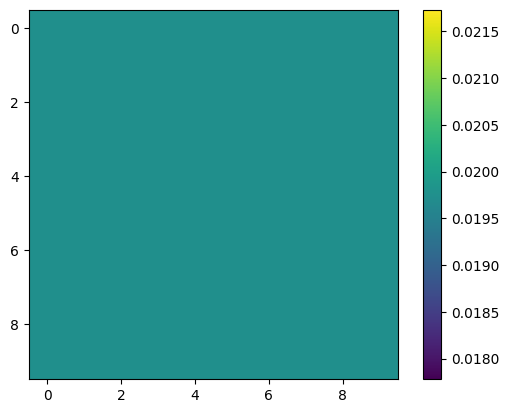

In [5]:
_ = plt.imshow(tile_catalog['shear_1'].squeeze())
_ = plt.colorbar()

Visualize the $r$-band of the image:

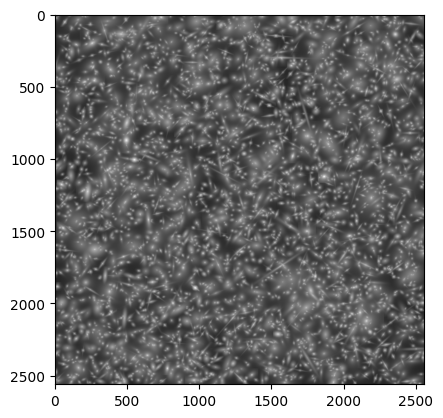

In [6]:
_ = plt.imshow((images[0][2] - images[0][2].min()).log(), cmap = 'gray')